<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Anna/test_anna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Example usage
points = np.array([
    [0, 20],
    [1, 1],
    [2, 3],
    [-4, 10],
    [3, 2],
    [-2, -1],
    [-3, 4],
    [5, -2]
])

In [21]:
# Helper function to compute the distance of a point from a line segment
def compute_distance(start, end, point):
    '''Compute the signed area of the parallelogram spanned by vectors (end-start) and (point-start)'''
    return np.cross(end - start, point - start)

# Function to divide points into subsets relative to a line segment
def divide_area(start, end, points):
    '''Divide points based on their position relative to the line from start to end'''
    S1, S2 = [], []
    for point in points:
        dis = compute_distance(start, end, point)
        if dis > 0:
            S1.append(point)
        else:
            S2.append(point)
    return np.array(S1), np.array(S2)

# Main QuickHull algorithm implementation
class QuickHull:
    def __init__(self, points):
        self.points = np.array(points)
        self.hull = []

    def execute(self):
        # Base case: if there are fewer than 3 unique points, cannot form a convex hull
        if len(self.points) < 3:
            return None

        # Find leftmost and rightmost points
        left_most = min(self.points, key=lambda point: point[0])
        right_most = max(self.points, key=lambda point: point[0])

        # Initialize convex hull with leftmost and rightmost points
        self.hull.append(left_most)
        self.hull.append(right_most)

        # Divide remaining points into two groups relative to the line segment
        S1, S2 = divide_area(left_most, right_most, self.points)

        # Recursive steps to find points on the hull
        self.find_hull(S1, left_most, right_most)
        self.find_hull(S2, right_most, left_most)

        return np.array(self.hull)

    def find_hull(self, points, P, Q):
        if len(points) == 0:
            return

        # Find the farthest point from the line PQ
        C = max(points, key=lambda point: np.abs(compute_distance(P, Q, point)))
        self.hull.append(C)

        # Remove C from points to avoid reconsidering it
        points = np.array([point for point in points if not np.array_equal(point, C)])

        # Divide points into two subsets relative to PC and CQ
        S1, _ = divide_area(P, C, points)
        S2, _ = divide_area(C, Q, points)

        # Recursively find points on the hull in subsets S1 and S2
        self.find_hull(S1, P, C)
        self.find_hull(S2, C, Q)

qh = QuickHull(points)
convex_hull = qh.execute()
print("Convex Hull Points:\n", convex_hull)

Convex Hull Points:
 [[-4 10]
 [ 5 -2]
 [ 0 20]
 [-2 -1]
 [-3  4]]


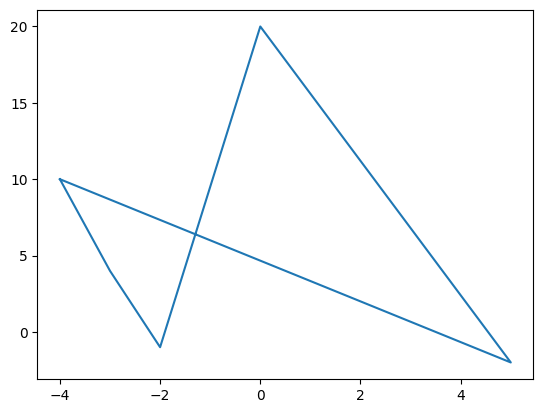

In [22]:
convex_hull = np.vstack([convex_hull, convex_hull[0]])
plt.plot(convex_hull[:,0], convex_hull[:,1])
plt.show()